In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df1 = pd.read_csv("risk_dataset.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_ID             2300 non-null   int64  
 1   Department              2300 non-null   object 
 2   Location                2300 non-null   object 
 3   Employment_Type         2300 non-null   object 
 4   Shift_Type              2300 non-null   object 
 5   Job_Level               2300 non-null   int64  
 6   Tenure_Months           2300 non-null   int64  
 7   Base_Salary             2300 non-null   int64  
 8   HRA                     2300 non-null   int64  
 9   Allowances              2300 non-null   int64  
 10  Bonus                   2300 non-null   int64  
 11  Overtime_Hours          2300 non-null   int64  
 12  Leaves_Taken            2300 non-null   int64  
 13  Sick_Leaves             2300 non-null   int64  
 14  Casual_Leaves           2300 non-null   

In [4]:
df1.describe()

,Employee_ID,Job_Level,Tenure_Months,Base_Salary,HRA,Allowances,Bonus,Overtime_Hours,Leaves_Taken,Sick_Leaves,...,Training_Hours,Engagement_Score,Manual_Payroll_Edits,Policy_Violations,Previous_Audit_Flags,Manager_Changes,Remote_Work_Days,Travel_Days,Risk_Score,High_Risk
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,9150.500000,3.497826,39.697826,48617.590870,18740.477826,5516.500000,5986.956522,9.716087,3.802174,2.061739,...,21.222174,3.631600,1.198261,1.183913,0.515217,0.746957,2.507391,2.961304,0.211903,0.135652
std,664.097131,1.736063,19.557201,13161.300028,5376.924922,2022.774325,5819.512733,5.525204,2.663447,1.409783,...,11.239639,0.667061,1.066634,1.047627,0.499877,0.831818,1.698050,3.141824,0.110412,0.342493
min,8001.000000,1.000000,0.000000,18000.000000,6836.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.049522,0.000000
25%,8575.750000,2.000000,25.000000,37682.000000,14364.000000,3765.750000,0.000000,6.000000,2.000000,1.000000,...,13.000000,3.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.131752,0.000000
50%,9150.500000,4.000000,39.000000,48457.500000,18514.500000,5514.500000,5000.000000,9.000000,4.000000,2.000000,...,21.000000,3.610000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.206792,0.000000
75%,9725.250000,5.000000,53.000000,59408.000000,22761.500000,7212.250000,10000.000000,13.000000,6.000000,3.000000,...,29.000000,4.220000,2.000000,2.000000,1.000000,2.000000,4.000000,5.000000,0.281710,0.000000
max,10300.000000,6.000000,107.000000,82686.000000,34513.000000,8997.000000,15000.000000,31.000000,13.000000,4.000000,...,57.000000,4.800000,3.000000,3.000000,1.000000,2.000000,5.000000,8.000000,0.660826,1.000000


In [5]:
df1.isnull().sum()

Employee_ID                 0
Department                  0
Location                    0
Employment_Type             0
Shift_Type                  0
Job_Level                   0
Tenure_Months               0
Base_Salary                 0
HRA                         0
Allowances                  0
Bonus                       0
Overtime_Hours              0
Leaves_Taken                0
Sick_Leaves                 0
Casual_Leaves               0
Late_Logins                 0
Early_Logouts               0
Missed_Punches              0
Attendance_Variance       172
Salary_Change_Pct           0
Salary_Change_Count_6M      0
Performance_Rating          0
Training_Hours              0
Engagement_Score            0
Manual_Payroll_Edits        0
Policy_Violations           0
Previous_Audit_Flags        0
Manager_Changes             0
Remote_Work_Days            0
Travel_Days                 0
Risk_Score                  0
High_Risk                   0
dtype: int64

In [68]:
non_cat = [i for i in df1.columns if df1[i].dtype!="O"]

In [69]:
num_dt = [i for i in non_cat if i not in 'Employee_ID'+'High_Risk'+'Risk_Score']

In [14]:
num_dt

['Job_Level',
 'Tenure_Months',
 'Base_Salary',
 'HRA',
 'Allowances',
 'Bonus',
 'Overtime_Hours',
 'Leaves_Taken',
 'Sick_Leaves',
 'Casual_Leaves',
 'Late_Logins',
 'Early_Logouts',
 'Missed_Punches',
 'Attendance_Variance',
 'Salary_Change_Pct',
 'Salary_Change_Count_6M',
 'Performance_Rating',
 'Training_Hours',
 'Engagement_Score',
 'Manual_Payroll_Edits',
 'Policy_Violations',
 'Previous_Audit_Flags',
 'Manager_Changes',
 'Remote_Work_Days',
 'Travel_Days']

In [70]:
cat = [i for i in df1.columns if i not in non_cat]

In [16]:
cat

['Department', 'Location', 'Employment_Type', 'Shift_Type']

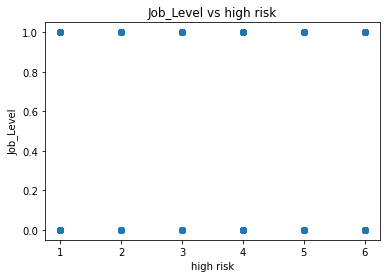

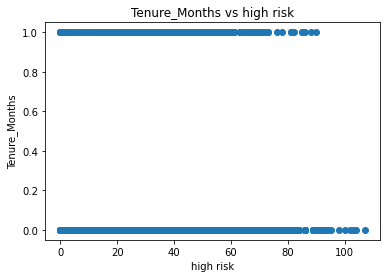

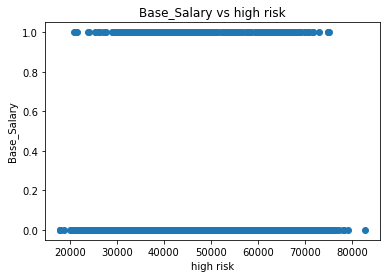

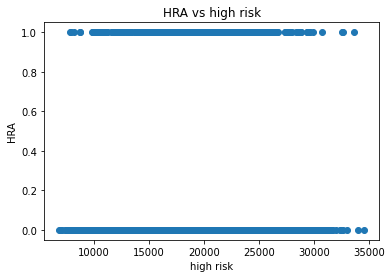

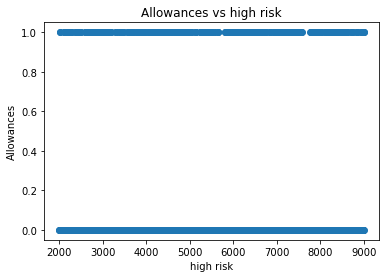

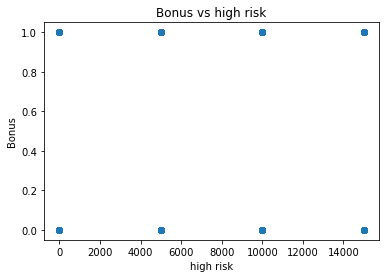

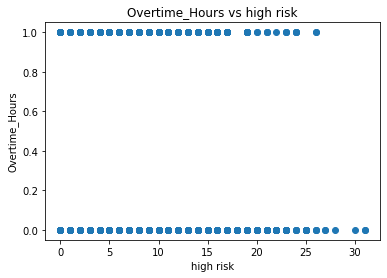

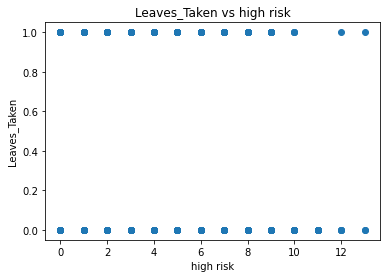

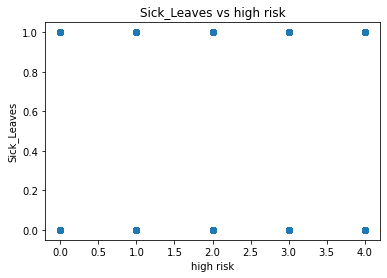

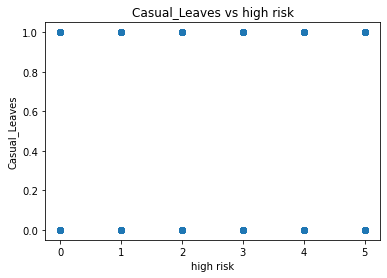

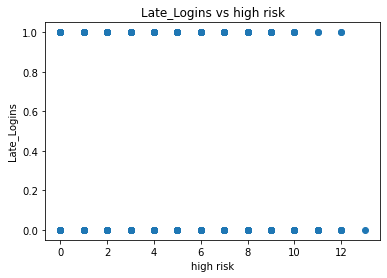

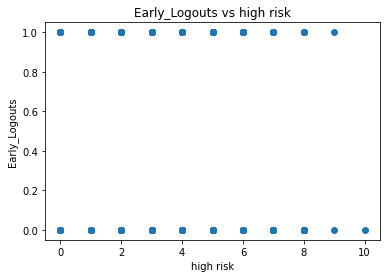

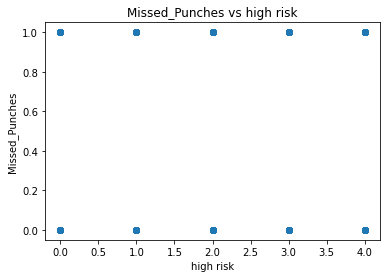

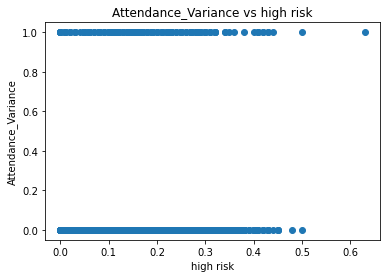

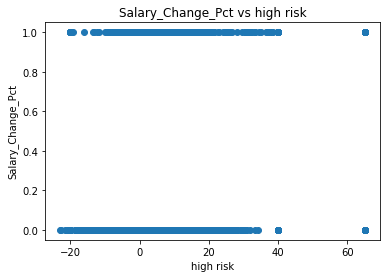

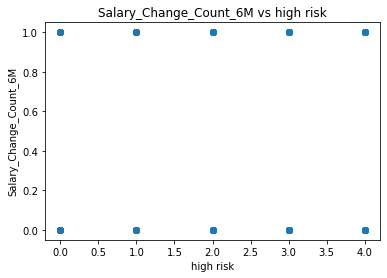

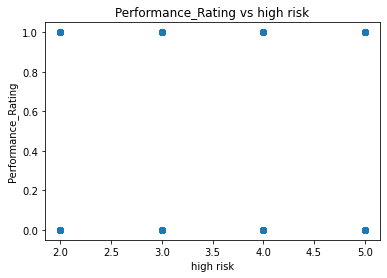

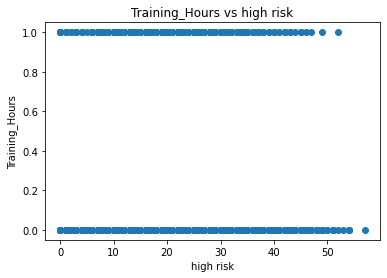

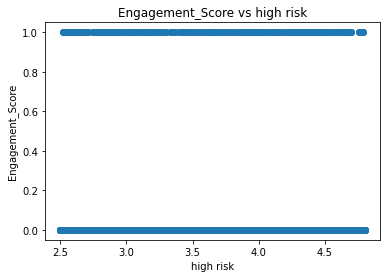

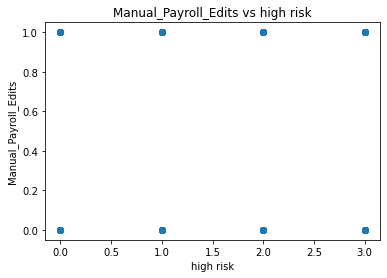

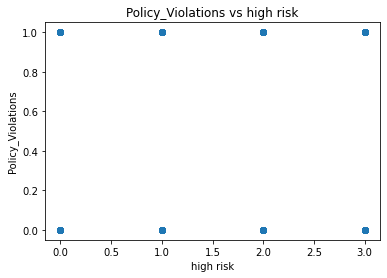

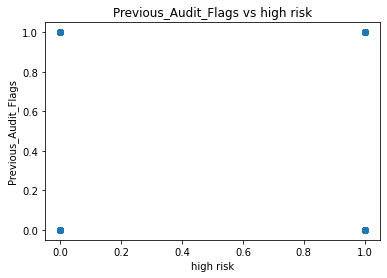

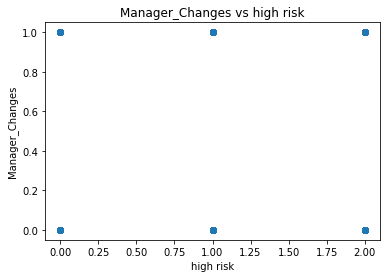

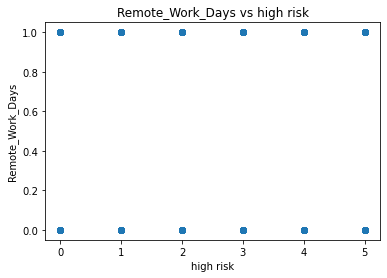

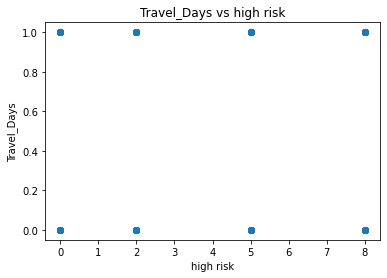

In [18]:
for i in num_dt:
    plt.scatter(df1[i],df1["High_Risk"])
    plt.xlabel("high risk")
    plt.ylabel(i)
    plt.title(f"{i} vs high risk")
    plt.show()

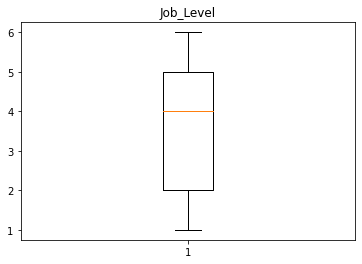

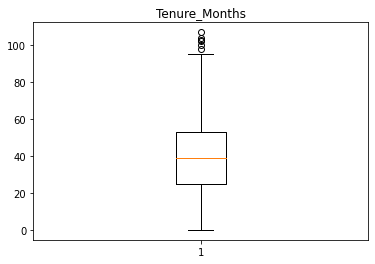

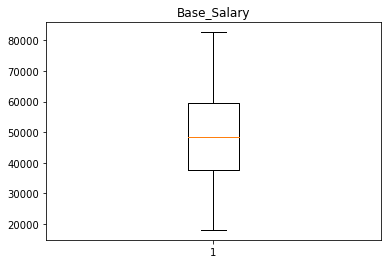

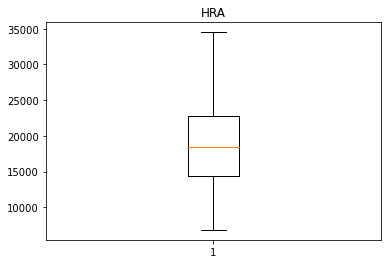

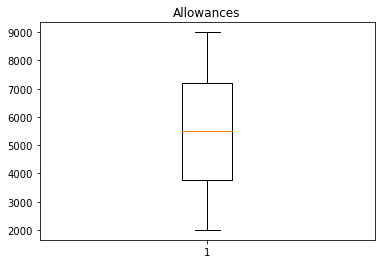

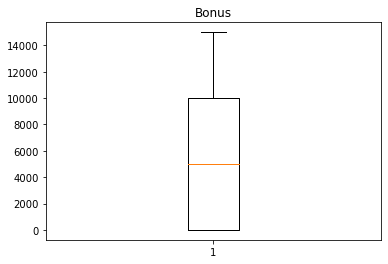

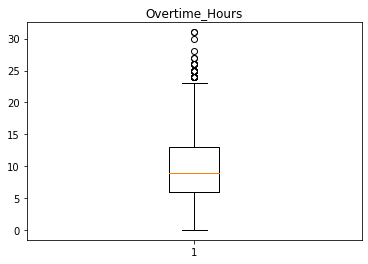

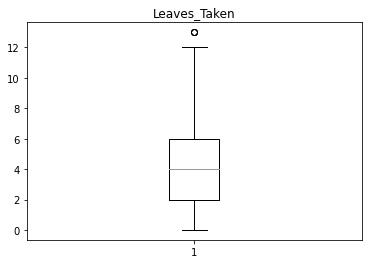

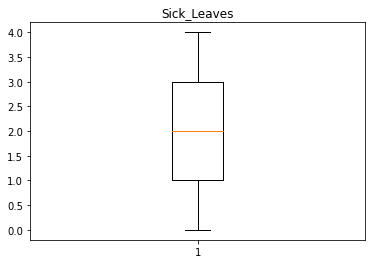

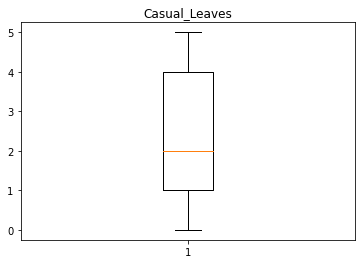

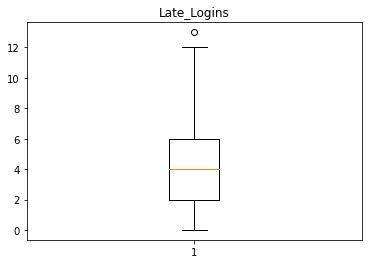

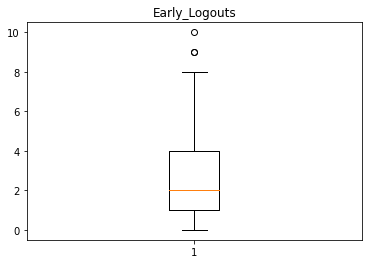

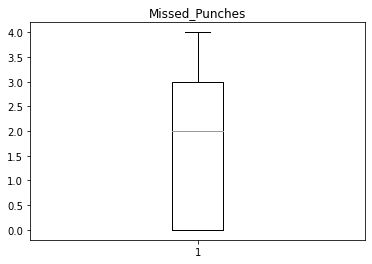

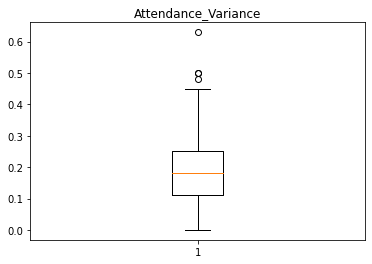

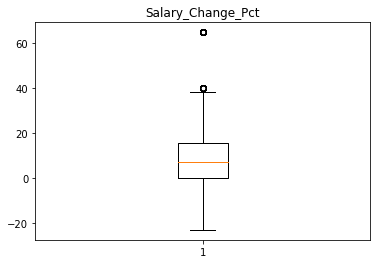

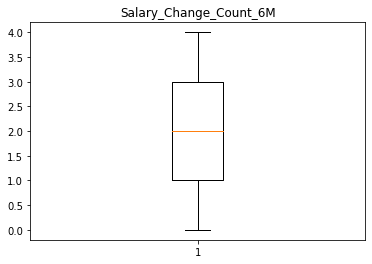

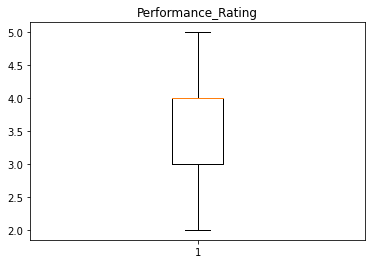

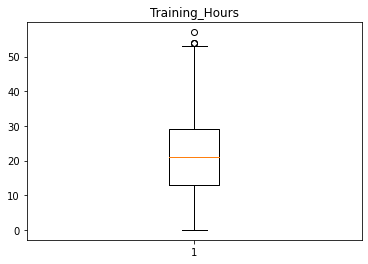

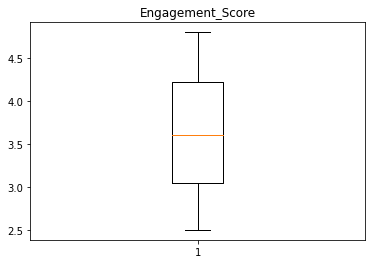

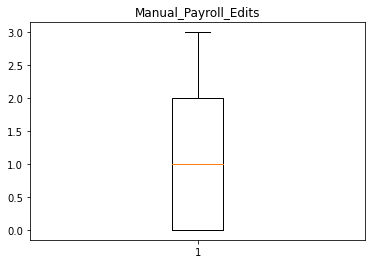

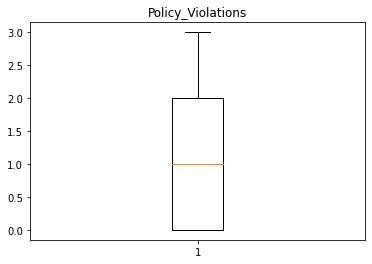

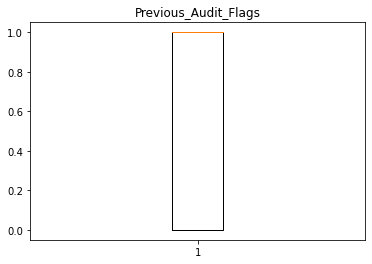

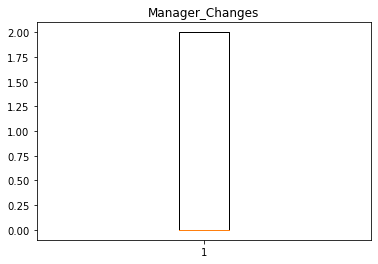

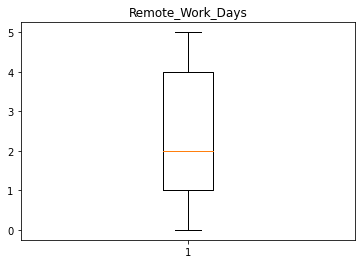

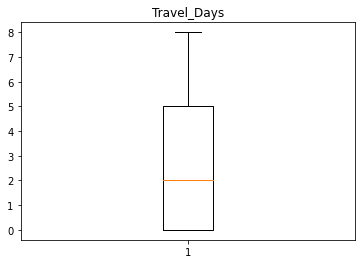

In [19]:
for i in num_dt:
    plt.boxplot(df1[i].dropna())
    plt.title(f"Boxplot of {i}")
    plt.title(i)
    plt.show()

In [21]:
correlate = df1[non_cat].corr()
corr_hr = correlate.drop("High_Risk")

In [22]:
corr_hr

,Employee_ID,Job_Level,Tenure_Months,Base_Salary,HRA,Allowances,Bonus,Overtime_Hours,Leaves_Taken,Sick_Leaves,...,Training_Hours,Engagement_Score,Manual_Payroll_Edits,Policy_Violations,Previous_Audit_Flags,Manager_Changes,Remote_Work_Days,Travel_Days,Risk_Score,High_Risk
Employee_ID,1.000000,-0.009057,0.001149,-0.025298,-0.020627,0.021540,0.015928,-0.018105,0.003176,-0.007774,...,-0.012777,0.036814,-0.028753,-0.008209,-0.001919,0.000260,0.009842,0.004143,-0.010957,0.013949
Job_Level,-0.009057,1.000000,0.022548,0.927313,0.868272,0.004875,0.013559,-0.034415,0.020367,0.000943,...,0.041811,0.005149,0.050266,-0.017598,0.024598,-0.025381,-0.011209,-0.002767,0.034400,0.014396
Tenure_Months,0.001149,0.022548,1.000000,0.025100,0.018243,-0.011288,0.021654,-0.011405,-0.017123,-0.003693,...,-0.003585,0.030159,0.004792,0.034006,-0.052943,0.031046,0.043782,0.017762,-0.014499,0.001187
Base_Salary,-0.025298,0.927313,0.025100,1.000000,0.936564,0.016232,0.009757,-0.025521,0.014959,0.013523,...,0.041626,0.001500,0.054184,-0.013606,0.027068,-0.024984,-0.001208,-0.002544,0.041130,0.021118
HRA,-0.020627,0.868272,0.018243,0.936564,1.000000,0.031383,-0.003003,-0.031375,0.017523,0.001868,...,0.033825,0.007433,0.057944,0.000388,0.013855,-0.021676,0.000783,-0.004886,0.040642,0.025073
Allowances,0.021540,0.004875,-0.011288,0.016232,0.031383,1.000000,0.012407,0.018705,0.016917,0.000329,...,-0.026510,0.010339,0.004417,-0.015923,0.008295,-0.000247,0.015109,0.006700,0.003061,-0.000828
Bonus,0.015928,0.013559,0.021654,0.009757,-0.003003,0.012407,1.000000,0.029213,-0.019810,-0.018564,...,-0.012797,0.019006,-0.002456,-0.016943,-0.010398,0.005338,0.010706,0.026236,-0.013313,-0.013734
Overtime_Hours,-0.018105,-0.034415,-0.011405,-0.025521,-0.031375,0.018705,0.029213,1.000000,0.000320,-0.021202,...,0.009379,0.025926,-0.028750,-0.026895,-0.004498,-0.015165,0.002797,-0.003214,-0.006968,-0.011359
Leaves_Taken,0.003176,0.020367,-0.017123,0.014959,0.017523,0.016917,-0.019810,0.000320,1.000000,0.011131,...,0.013994,0.033014,-0.023088,0.059187,0.012553,-0.035955,0.017876,-0.016977,0.019283,-0.016345
Sick_Leaves,-0.007774,0.000943,-0.003693,0.013523,0.001868,0.000329,-0.018564,-0.021202,0.011131,1.000000,...,-0.015497,0.026250,-0.031574,-0.020944,-0.024171,0.021859,-0.006914,0.007610,-0.019632,-0.011948


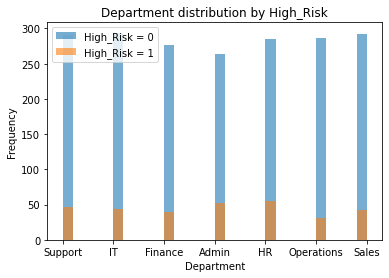

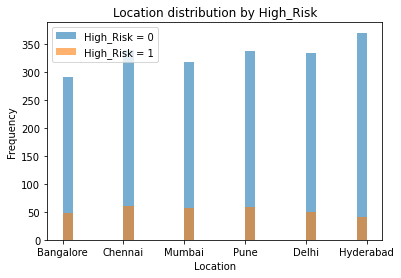

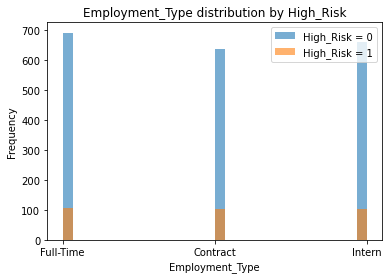

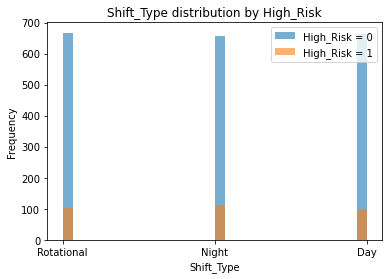

In [71]:
#checking categorical data 
for col in cat:
    plt.figure(figsize=(6,4))
    
    plt.hist(
        df1[df1["High_Risk"] == 0][col],
        bins=30,
        alpha=0.6,
        label="High_Risk = 0"
    )
    
    plt.hist(
        df1[df1["High_Risk"] == 1][col],
        bins=30,
        alpha=0.6,
        label="High_Risk = 1"
    )
    
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"{col} distribution by High_Risk")
    plt.legend()
    plt.show()


In [23]:
#handling missing values
df1["Attendance_Variance"].describe()

count    2128.000000
mean        0.181212
std         0.094143
min         0.000000
25%         0.110000
50%         0.180000
75%         0.250000
max         0.630000
Name: Attendance_Variance, dtype: float64

In [25]:
median_value = df1["Attendance_Variance"].median()
median_value

0.18

In [26]:
#since median is lower than average so i will just use random numbers to fill the data cause only 172 are missing we got two options
#1st that we drop this column because it has negative correlation also its much closer to the 0 so may not be needed
#2nd but if we use it in feature enginerring we may find it usefull so i will randomly put values between mean and 75% perctinle
np.random.seed(32)

mask = df1['Attendance_Variance'].isna()
df1.loc[mask, 'Attendance_Variance'] = np.random.uniform(
    0.18, 0.25, size=mask.sum()
)

In [27]:
#now we check the decribed data , little bit increase changed so this was the good choice
df1["Attendance_Variance"].describe()

count    2300.000000
mean        0.183648
std         0.091109
min         0.000000
25%         0.120000
50%         0.183179
75%         0.240000
max         0.630000
Name: Attendance_Variance, dtype: float64

In [28]:
# alright now we will do feature enigneering as per the requirments attendance patterns , leave frequency ,salary changes
# attendance patterns
df1["Total_Leaves"] = (df1["Sick_Leaves"] + df1["Casual_Leaves"])
df1["Attend_Issues"] = (df1["Late_Logins"] + df1["Early_Logouts"] + df1["Missed_Punches"])
df1["High_Attendance_Risk"] = (df1["Attend_Issues"] >= 5).astype(int)

In [30]:
#checking leave frequency
df1["High_Leave"] = (df1["Leaves_Taken"] >= 12).astype(int)
df1["leave_frequency"] = ((df1["Total_Leaves"] /(df1["Tenure_Months"]))

In [31]:
#salary changes
df1["High_Salary_Change"] = (df1["Salary_Change_Pct"].abs() >= 20).astype(int)
df1["Frequent_Salary_Changes"] = (df1["Salary_Change_Count_6M"] >= 2).astype(int)

In [32]:
# now handling categorical data using one hot encoding because label encoding wont work here we dont want to wieght them 
#if we did it will have huge impact on the output we dont want to do that
# before that we will handle those values which comes rarerly
for i in cat:
    freq = df1[i].value_counts(normalize=True)
    rare = freq[freq < 0.02].index
    df1[i] = df1[i].replace(rare, "Other")

In [33]:
df1 = pd.get_dummies(df1,columns=cat,drop_first=True)  

In [36]:
# lets standardize our data just the numerical ones.
#doing again because we updated our dataset with new coloumns
non_cat = [i for i in df1.columns if df1[i].dtype!="O"]
num_dt = [i for i in non_cat if i not in 'Employee_ID'+'High_Risk'+'Risk_Score']

In [50]:
# using robust scaler because in my dataset values lies -infinty to +infifnty 
float_cols = df1.select_dtypes(include='float').columns
df1[float_cols] = df1[float_cols].round(2)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df1[num_dt] = scaler.fit_transform(df1[num_dt])

In [48]:
#we will remove those rows with infinity values
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()


In [49]:
np.isinf(df1).values.any()

False

In [43]:
np.isinf(df1).sum()

Employee_ID                   0
Job_Level                     0
Tenure_Months                 0
Base_Salary                   0
HRA                           0
Allowances                    0
Bonus                         0
Overtime_Hours                0
Leaves_Taken                  0
Sick_Leaves                   0
Casual_Leaves                 0
Late_Logins                   0
Early_Logouts                 0
Missed_Punches                0
Attendance_Variance           0
Salary_Change_Pct             0
Salary_Change_Count_6M        0
Performance_Rating            0
Training_Hours                0
Engagement_Score              0
Manual_Payroll_Edits          0
Policy_Violations             0
Previous_Audit_Flags          0
Manager_Changes               0
Remote_Work_Days              0
Travel_Days                   0
Risk_Score                    0
High_Risk                     0
Total_Leaves                  0
Attend_Issues                 0
High_Attendance_Risk          0
High_Lea

In [47]:
df1.isna().sum()
np.isinf(df1).sum()


Employee_ID                   0
Job_Level                     0
Tenure_Months                 0
Base_Salary                   0
HRA                           0
Allowances                    0
Bonus                         0
Overtime_Hours                0
Leaves_Taken                  0
Sick_Leaves                   0
Casual_Leaves                 0
Late_Logins                   0
Early_Logouts                 0
Missed_Punches                0
Attendance_Variance           0
Salary_Change_Pct             0
Salary_Change_Count_6M        0
Performance_Rating            0
Training_Hours                0
Engagement_Score              0
Manual_Payroll_Edits          0
Policy_Violations             0
Previous_Audit_Flags          0
Manager_Changes               0
Remote_Work_Days              0
Travel_Days                   0
Risk_Score                    0
High_Risk                     0
Total_Leaves                  0
Attend_Issues                 0
High_Attendance_Risk          0
High_Lea

In [51]:
# dropping this because it will just give away and our model wont learn well 
df1 = df1.drop("Risk_Score",axis = 1)
a = df1.drop("High_Risk", axis = 1)
b = df1["High_Risk"]

In [52]:
# lets go to model building phase now we will use logisctic regression , random forest , Xg boost
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    a, b, test_size=0.35, random_state=51)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
lr = LogisticRegression(penalty="l2",C=1.0,solver="liblinear",class_weight="balanced",max_iter=1000,random_state=51)
rf = RandomForestClassifier(n_estimators=450,max_depth=15,min_samples_split=10,min_samples_leaf=5,class_weight="balanced",random_state=51)
xg = GradientBoostingClassifier(n_estimators=450,max_depth=6,learning_rate=0.05,subsample=0.8,random_state=51)
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
xg.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=450,
                           random_state=51, subsample=0.8)

In [60]:
#doing testing on this now
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XG boosting": xg
}

results = []

for i, j in models.items():
    preds = j.predict(X_test)
    results.append([i,accuracy_score(y_test, preds),precision_score(y_test, preds),recall_score(y_test, preds),f1_score(y_test, preds)])           

In [61]:
#comparison table of the models 
comparison_df = pd.DataFrame(results,columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
comparison_df   

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.822943,0.417476,0.796296,0.547771
1,Random Forest,0.910224,0.810345,0.435185,0.566265
2,XG boosting,0.905237,0.785714,0.407407,0.536585
